# Desc

- using this file to practice/learn basic stats
- also want to learn standard time series analysis techniques

In [1]:
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.ar_model import AutoReg

from sklearn.metrics import r2_score

# Sample autoregressive models

In [4]:
# acf/pacf on an autoregressive model
def ar(history, params):
    base = np.sum(np.array(history[-len(params):]) * params)
    shock = np.random.normal(loc=0, scale=1)
    return base + shock


def gen_data(n, params):
    print("gen_data", n, params)
    params = np.array(params[::-1])
    history = [0] * len(params)

    for i in range(n):
        history += [ar(history, params)]
    return np.array(history)[-n:]

## Data vis

gen_data 20000 [1]
gen_data 20000 [0.5]
gen_data 20000 [0.95]
gen_data 20000 [0.99]
gen_data 20000 [0.5, -0.5]
gen_data 20000 [0.89, 0.1]
gen_data 20000 [0]


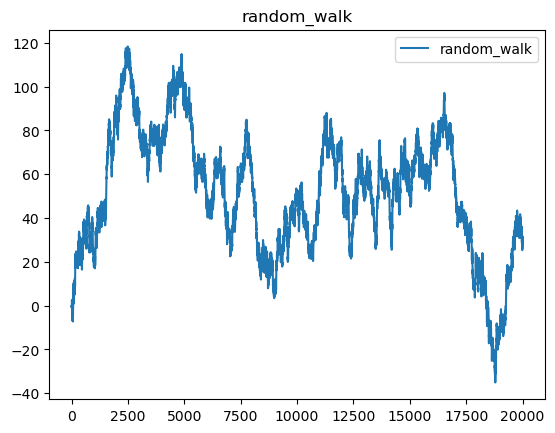

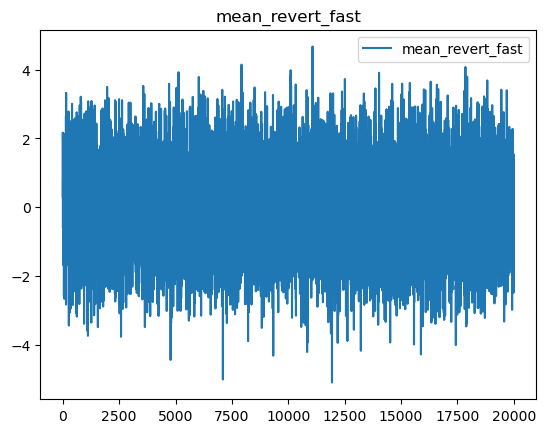

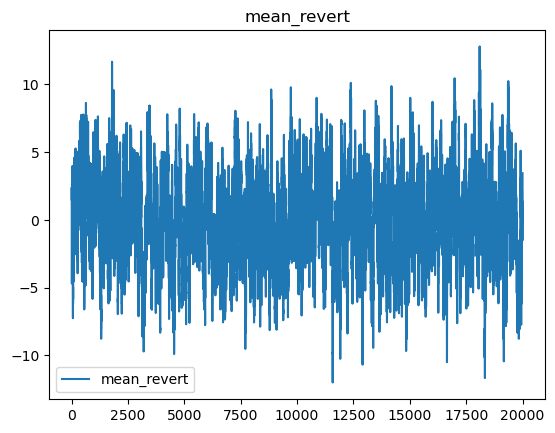

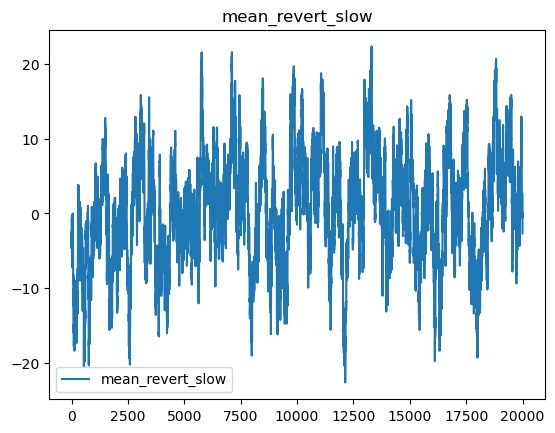

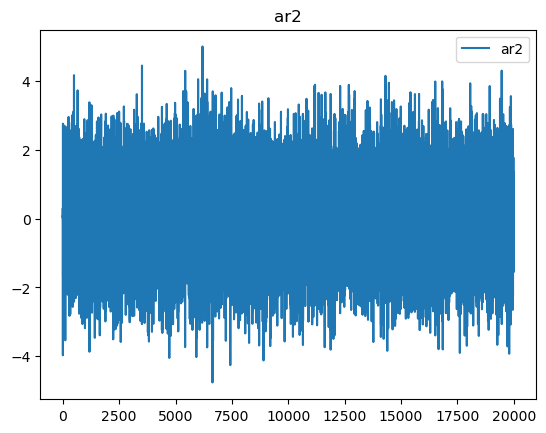

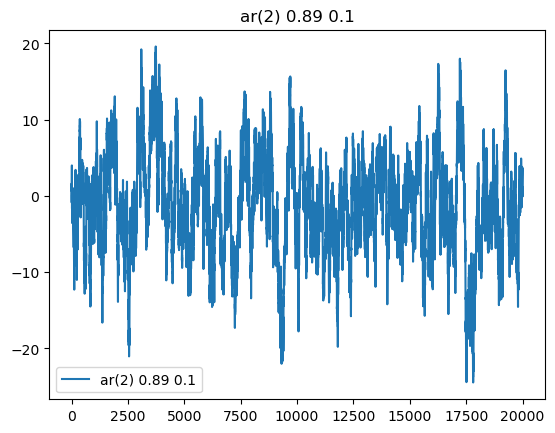

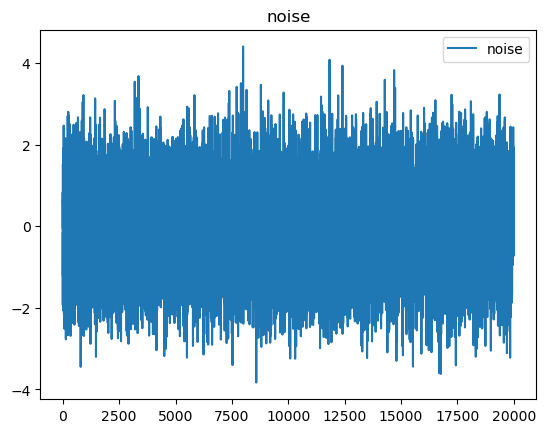

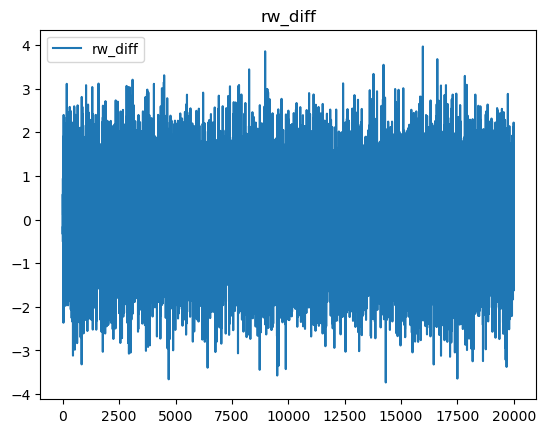

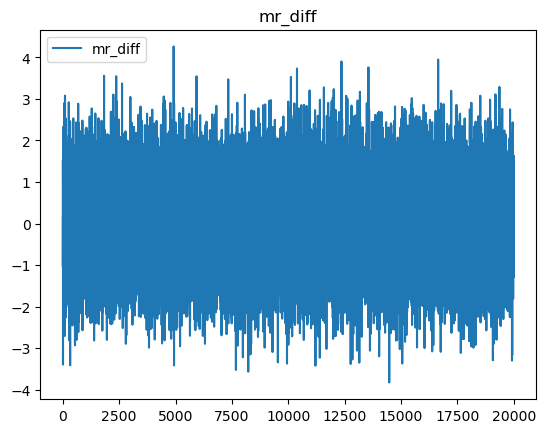

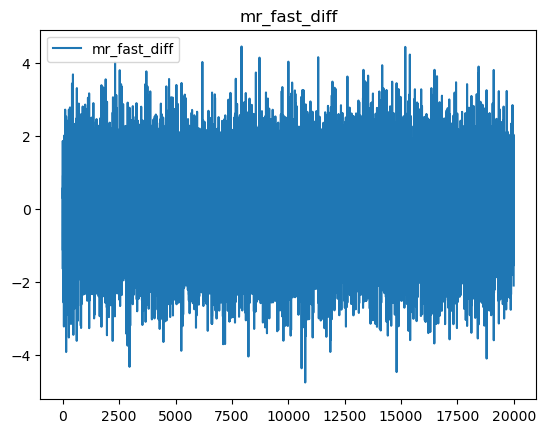

In [5]:
num_samples = 20000

data_df = pd.DataFrame({
    "random_walk": gen_data(num_samples, [1]), 
    "mean_revert_fast": gen_data(num_samples, [0.5]), 
    "mean_revert": gen_data(num_samples, [0.95]), 
    "mean_revert_slow": gen_data(num_samples, [0.99]), 
    "ar2": gen_data(num_samples, [0.5, -0.5]),
    "ar(2) 0.89 0.1": gen_data(num_samples, [0.89, 0.1]),
    "noise": gen_data(num_samples, [0]),
})
data_df["rw_diff"] = data_df["random_walk"] - data_df["random_walk"].shift(1).fillna(0)
data_df["mr_diff"] = data_df["mean_revert"] - data_df["mean_revert"].shift(1).fillna(0)
data_df["mr_fast_diff"] = data_df["mean_revert_fast"] - data_df["mean_revert_fast"].shift(1).fillna(0)

for col in data_df.columns:
    plt.plot(data_df[col], label=col)
    plt.title(col)
    plt.legend()
    plt.show()


(array([ 168.,  616.,  682., 2256., 3444., 3729., 4232., 2932., 1330.,
         611.]),
 array([-35.05837105, -19.72142921,  -4.38448737,  10.95245446,
         26.2893963 ,  41.62633814,  56.96327997,  72.30022181,
         87.63716365, 102.97410549, 118.31104732]),
 <BarContainer object of 10 artists>)

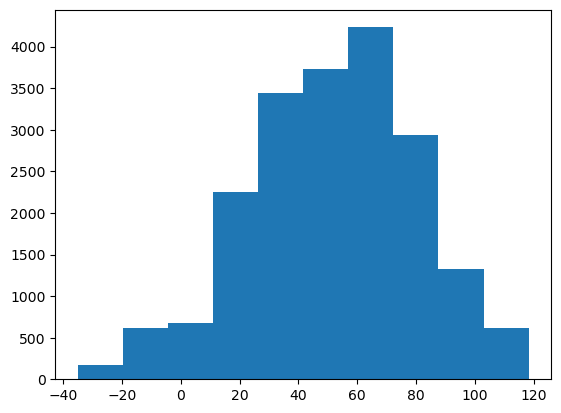

In [6]:
plt.hist(data_df["random_walk"])

(array([2.000e+00, 6.000e+00, 1.200e+01, 5.100e+01, 1.550e+02, 4.210e+02,
        8.810e+02, 1.486e+03, 2.412e+03, 3.121e+03, 3.323e+03, 3.083e+03,
        2.272e+03, 1.474e+03, 7.780e+02, 3.100e+02, 1.550e+02, 4.700e+01,
        1.000e+01, 1.000e+00]),
 array([-5.08982928, -4.60189175, -4.11395423, -3.62601671, -3.13807918,
        -2.65014166, -2.16220413, -1.67426661, -1.18632909, -0.69839156,
        -0.21045404,  0.27748349,  0.76542101,  1.25335853,  1.74129606,
         2.22923358,  2.71717111,  3.20510863,  3.69304615,  4.18098368,
         4.6689212 ]),
 <BarContainer object of 20 artists>)

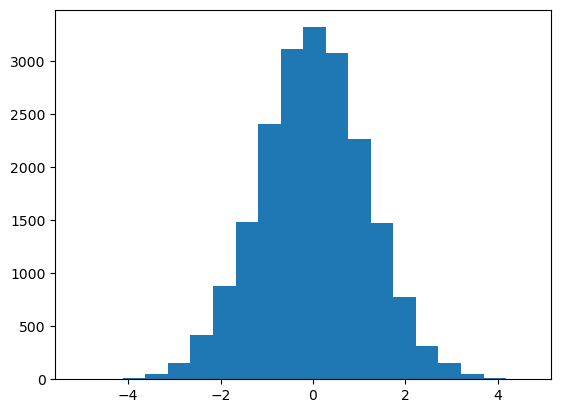

In [7]:
plt.hist(data_df["mean_revert_fast"], bins=20)

In [8]:

def check_stationary(series):
    # Copied from https://machinelearningmastery.com/time-series-data-stationary-python/

    result = adfuller(series.values)

    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if (result[1] <= 0.01) & (result[4]['5%'] > result[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

## stationary checks

In [9]:
for col in data_df.columns:
    print("\nChecking", col)
    check_stationary(data_df[col])



Checking random_walk
ADF Statistic: -2.808176
p-value: 0.057115
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary

Checking mean_revert_fast
ADF Statistic: -81.043676
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary

Checking mean_revert
ADF Statistic: -22.218285
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary

Checking mean_revert_slow
ADF Statistic: -9.807102
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary

Checking ar2
ADF Statistic: -138.591276
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary

Checking ar(2) 0.89 0.1
ADF Statistic: -9.946167
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary

Checking noise
ADF Statistic: -142.221978
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary

Checking rw_diff
ADF Statistic: -141.140152
p-value: 0.000000
Critical Values:
	

## random walk / mean reversion plots

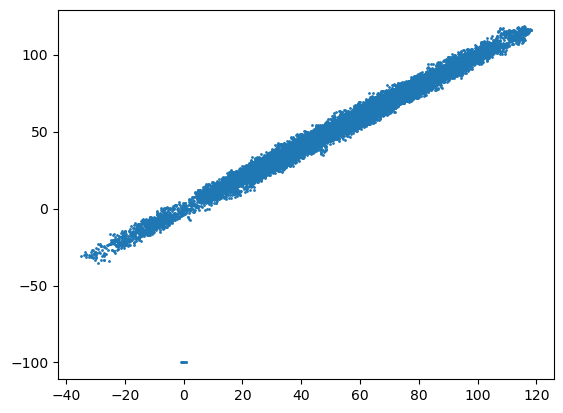

In [10]:
plt.scatter(data_df["random_walk"], data_df["random_walk"].shift(10).fillna(-100), s=1)

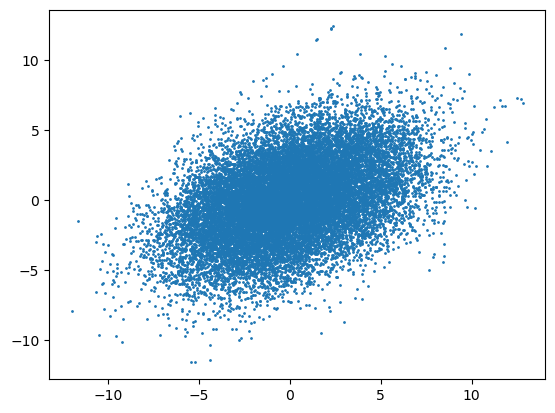

In [11]:
plt.scatter(data_df["mean_revert"], data_df["mean_revert"] - data_df["mean_revert"].shift(10).fillna(-10), s=1)

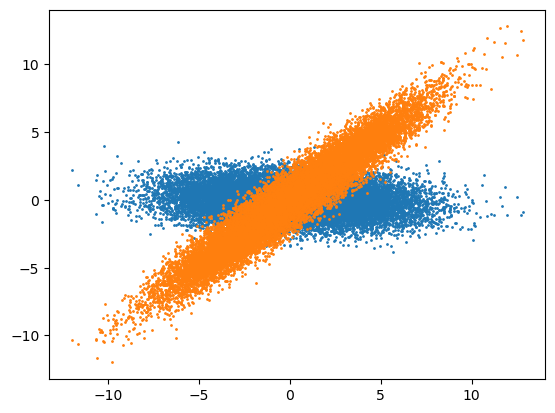

In [12]:
df = data_df[["mean_revert"]].join(data_df["mean_revert"].shift(-1) - data_df["mean_revert"], rsuffix="_diff").dropna()
plt.scatter(df["mean_revert"], df["mean_revert_diff"], s=1)
plt.scatter(df["mean_revert"], df["mean_revert"].shift(1).fillna(0), s=1)

r2 0.2472127823751552


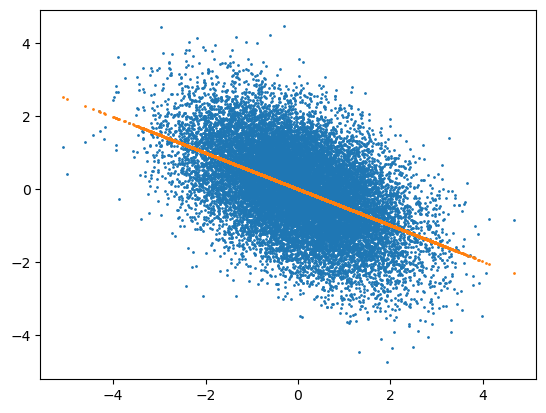

In [13]:
x = data_df["mean_revert_fast"]
y = (data_df["mean_revert_fast"].shift(-1) - data_df["mean_revert_fast"]).fillna(0)
model = np.poly1d(np.polyfit(x, y, deg=1))
score = r2_score(y, model(x))
print("r2", score)
plt.scatter(x, y, s=1)
plt.scatter(x, model(x), s=1)


## ACF / PACF plots

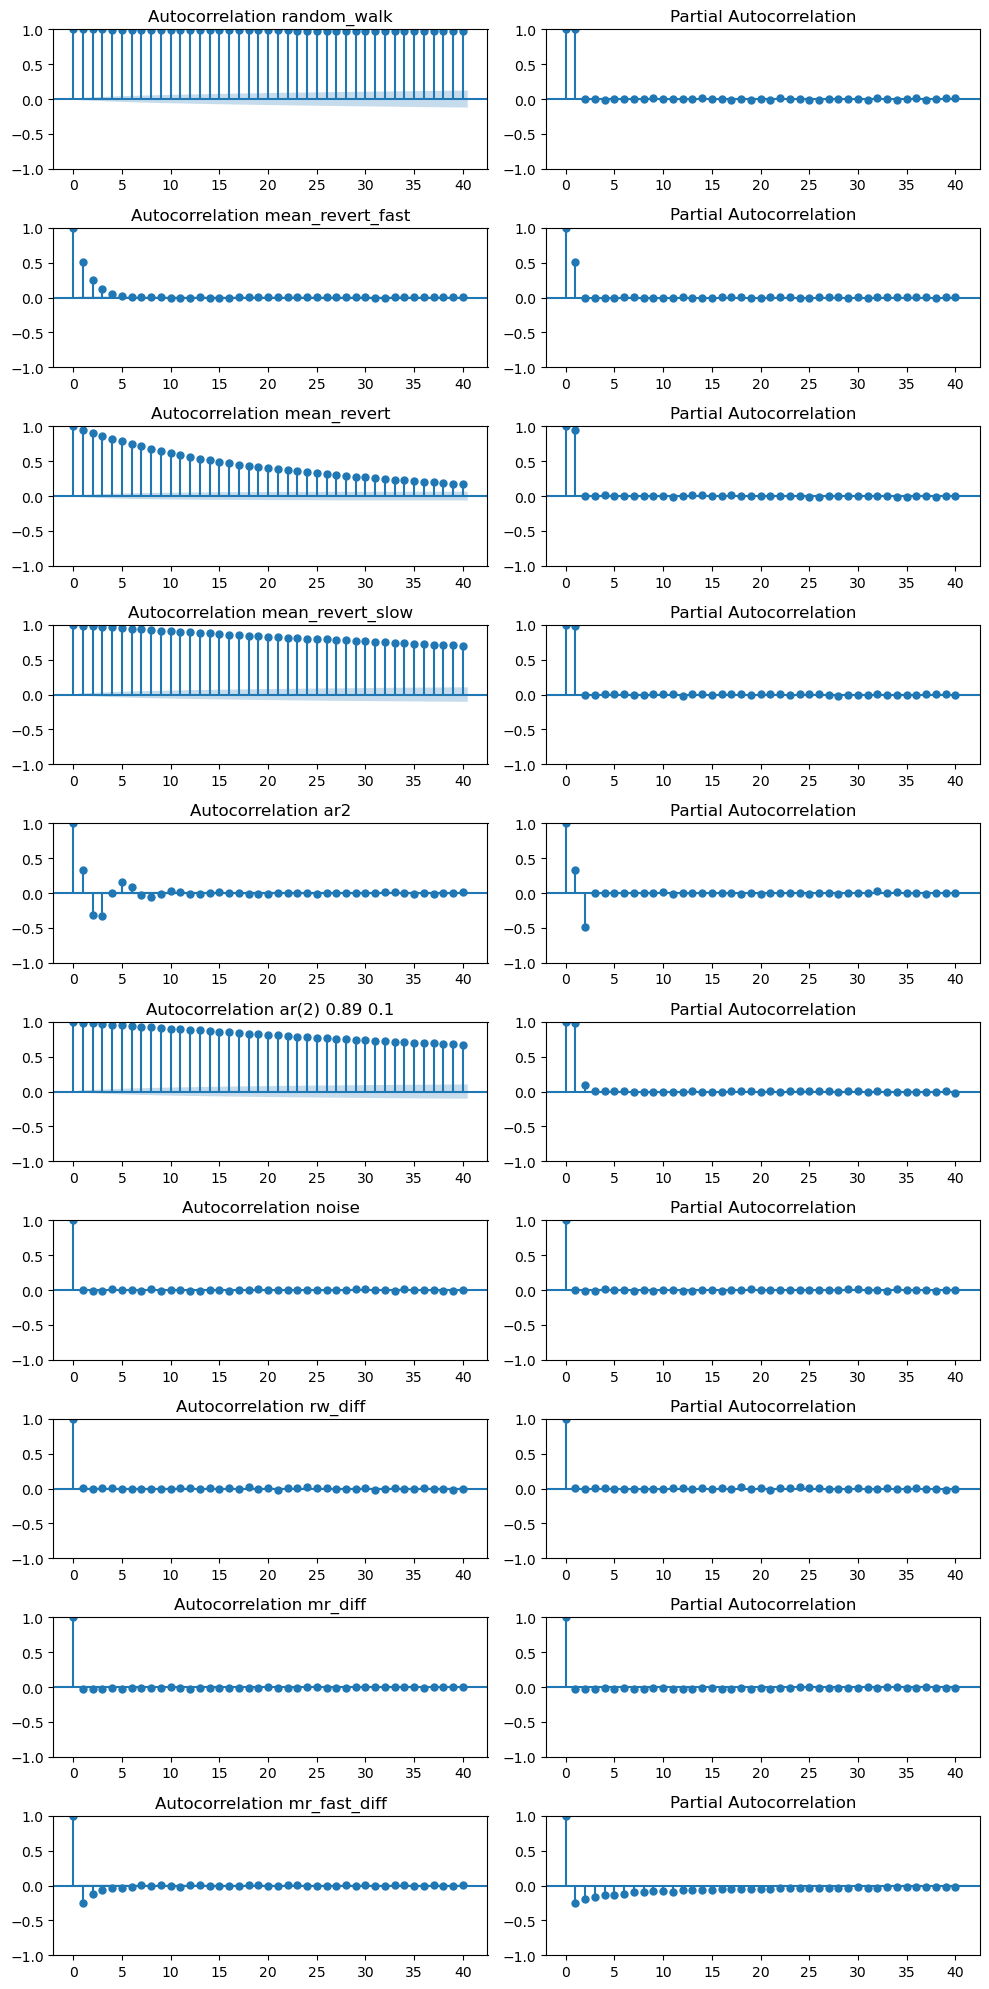

In [14]:
num_tests = len(data_df.columns)

fig, axs = plt.subplots(num_tests, 2, figsize=(10, 2 * num_tests))

for index, col in enumerate(data_df.columns):

    # plot data_a
    axrow = axs[index]
    
    ax = axrow[0]
    plot_acf(data_df[col], ax=ax, lags=40)
    ax.set_title(ax.get_title() + f" {col}")
    
    ax = axrow[1]
    plot_pacf(data_df[col], method="ywm", ax=ax, lags=40)
#     ax.set_ylim(-0.1, 0.1)



plt.tight_layout()
plt.show()

In [15]:
for col in data_df.columns:
    print(col)
    ar_model = AutoReg(data_df[col], lags=2).fit()
    print(ar_model.summary())
    print("\n"*3)

random_walk
                            AutoReg Model Results                             
Dep. Variable:            random_walk   No. Observations:                20000
Model:                     AutoReg(2)   Log Likelihood              -28503.831
Method:               Conditional MLE   S.D. of innovations              1.006
Date:                Sat, 25 Mar 2023   AIC                          57015.662
Time:                        18:49:50   BIC                          57047.276
Sample:                             2   HQIC                         57026.005
                                20000                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0384      0.015      2.576      0.010       0.009       0.068
random_walk.L1     1.0015      0.007    141.625      0.000       0.988       1.015
random_walk.L2    -0.002

# Analysis for IMC

## Data reading

In [16]:
# parameters
_round_num = 3
_time_per_day = 1000000

In [17]:
def get_file_trades(day):
    fname = f"../data/round{_round_num}/trades_round_{_round_num}_day_{day}_nn.csv"
    print("fname", fname)
    return pd.read_csv(fname, sep=";")


def get_file_prices(day):
    fname = f"../data/round{_round_num}/prices_round_{_round_num}_day_{day}.csv"
    print("fname", fname)
    return pd.read_csv(fname, sep=";")

def get_symbol_prices(symbol, days):
    """ Returns DataFrame containing all price data for specified symbol, over the specified 'days'
    If symbol is None, don't filter on symbol
    """
    
    data = []
    for day in days:
        price_df = get_file_prices(day)
        data += [price_df]
    
    # concat
    price_df = pd.concat(data)
    
    # rename "bid" to "buy"
    # rename "ask" to "sell"
    price_df = price_df.rename({col: col.replace("bid", "buy") for col in price_df.columns if "bid" in col}, axis=1)
    price_df = price_df.rename({col: col.replace("ask", "sell") for col in price_df.columns if "ask" in col}, axis=1)
    price_df = price_df.rename({"timestamp": "time", "product": "symbol"}, axis=1)
    
    if symbol is not None:
        # filter for specific symbol
        price_df = price_df[price_df["symbol"] == symbol]
    
    # fix times, sort by time and reindex
    price_df["time"] = price_df["time"] + price_df["day"] * _time_per_day
    price_df = price_df.sort_values(by="time").reset_index(drop=True)
    
    return price_df

def get_all_mids(days):
    price_df = get_symbol_prices(symbol=None, days=days)
    
    symbols = set(price_df["symbol"])
    
    price_df["mid"] = (price_df["buy_price_1"] + price_df["sell_price_1"]) / 2
    
    return price_df[["time", "symbol", "mid"]].copy()

In [18]:
def get_book_large_size(price_df, side):
    """ 
    side = 'buy' or 'sell' 
    
    Returns prices, sizes
    """
    
    book_range = list(range(1, 3+1))
    
    # get bids
    bid_sizes = price_df[[f"{side}_volume_{i}" for i in book_range]]
    bid_prices = price_df[[f"{side}_price_{i}" for i in book_range]]

    # replace nan with -1
    bid_sizes = bid_sizes.replace(np.nan, -1)

    # find inds
    inds = np.argmax(bid_sizes.to_numpy(), axis=1)

    # filter to keep largest bids
    bid_prices = bid_prices.to_numpy()[np.arange(len(bid_prices)), inds]
    bid_sizes = bid_sizes.to_numpy()[np.arange(len(bid_sizes)), inds]
    
    # create dataframe
    df = pd.DataFrame([bid_prices, bid_sizes]).T
    df.columns = [f"{side}_price", f"{side}_size"]
    df["time"] = price_df["time"].reset_index()["time"]
    
    return df


def get_whale_quotes(price_df):
    # get big buy/sell quotes
    buy_df = get_book_large_size(price_df, "buy")
    sell_df = get_book_large_size(price_df, "sell")

    # create big quote_df
    quote_df = pd.merge(buy_df, sell_df, on="time")
    quote_df["mid_price"] = (quote_df["buy_price"] + quote_df["sell_price"]) / 2
    quote_df["spread"] = quote_df["sell_price"] - quote_df["buy_price"]

    return quote_df

In [19]:
def scatter_noise(x, y, xnoise=0.1, ynoise=0.1, s=0.1, label=None):
    xp = x + np.random.normal(scale=xnoise, size=len(x))
    yp = y + np.random.normal(scale=ynoise, size=len(y))
    
    plt.scatter(
        xp, yp, 
        s=s, 
        label=label,
    )

## Bananas

fname ../data/round3/prices_round_3_day_0.csv
fname ../data/round3/prices_round_3_day_1.csv
fname ../data/round3/prices_round_3_day_2.csv
fname ../data/round3/prices_round_3_day_0.csv
fname ../data/round3/prices_round_3_day_1.csv
fname ../data/round3/prices_round_3_day_2.csv


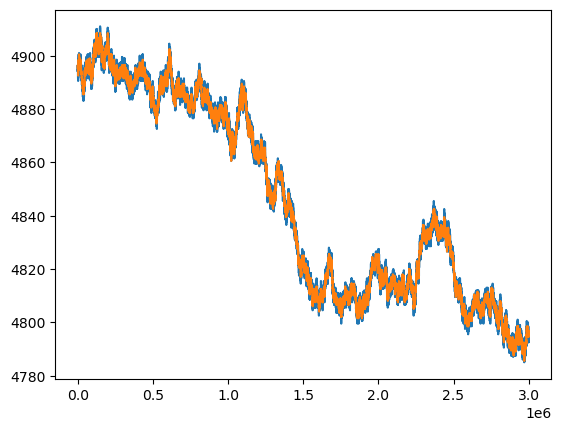

(array([ 573., 1005., 1282., 4077., 3578., 1926.,  999., 1517.,  813.,
         669.,  563.,  485.,  798.,  724., 1060., 2239., 2861., 2961.,
        1265.,  605.]),
 array([4785.5 , 4791.65, 4797.8 , 4803.95, 4810.1 , 4816.25, 4822.4 ,
        4828.55, 4834.7 , 4840.85, 4847.  , 4853.15, 4859.3 , 4865.45,
        4871.6 , 4877.75, 4883.9 , 4890.05, 4896.2 , 4902.35, 4908.5 ]),
 <BarContainer object of 20 artists>)

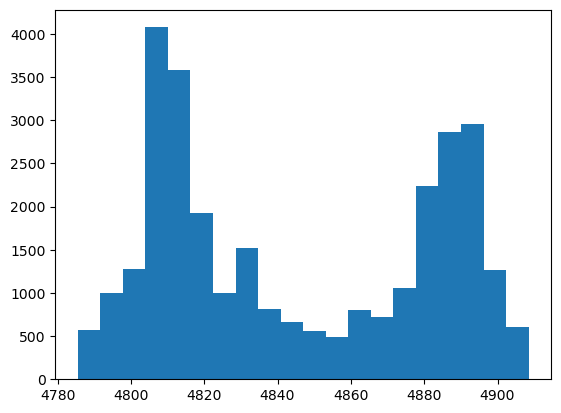

In [20]:
_symbol = "BANANAS"
_day_range = [0, 1, 2]

price_df = get_symbol_prices(_symbol, _day_range)

mid_df = get_all_mids(_day_range)
mid_df = mid_df[mid_df["symbol"] == _symbol].reset_index(drop=True)
plt.plot(mid_df["time"], mid_df["mid"])

quote_df = get_whale_quotes(price_df)
quote_df["mid"] = (quote_df["buy_price"] + quote_df["sell_price"]) / 2
plt.plot(quote_df["time"], quote_df["mid"])

plt.show()

plt.hist(quote_df["mid"], bins=20)


#### BANANAS are non-stationary


BANANAS mid_raw
ADF Statistic: -0.888784
p-value: 0.791643
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary

BANANAS mid_raw diff
ADF Statistic: -64.267626
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary

BANANAS mid_whale
ADF Statistic: -0.905390
p-value: 0.786192
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Non-stationary

BANANAS mid_whale diff
ADF Statistic: -94.277413
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Stationary


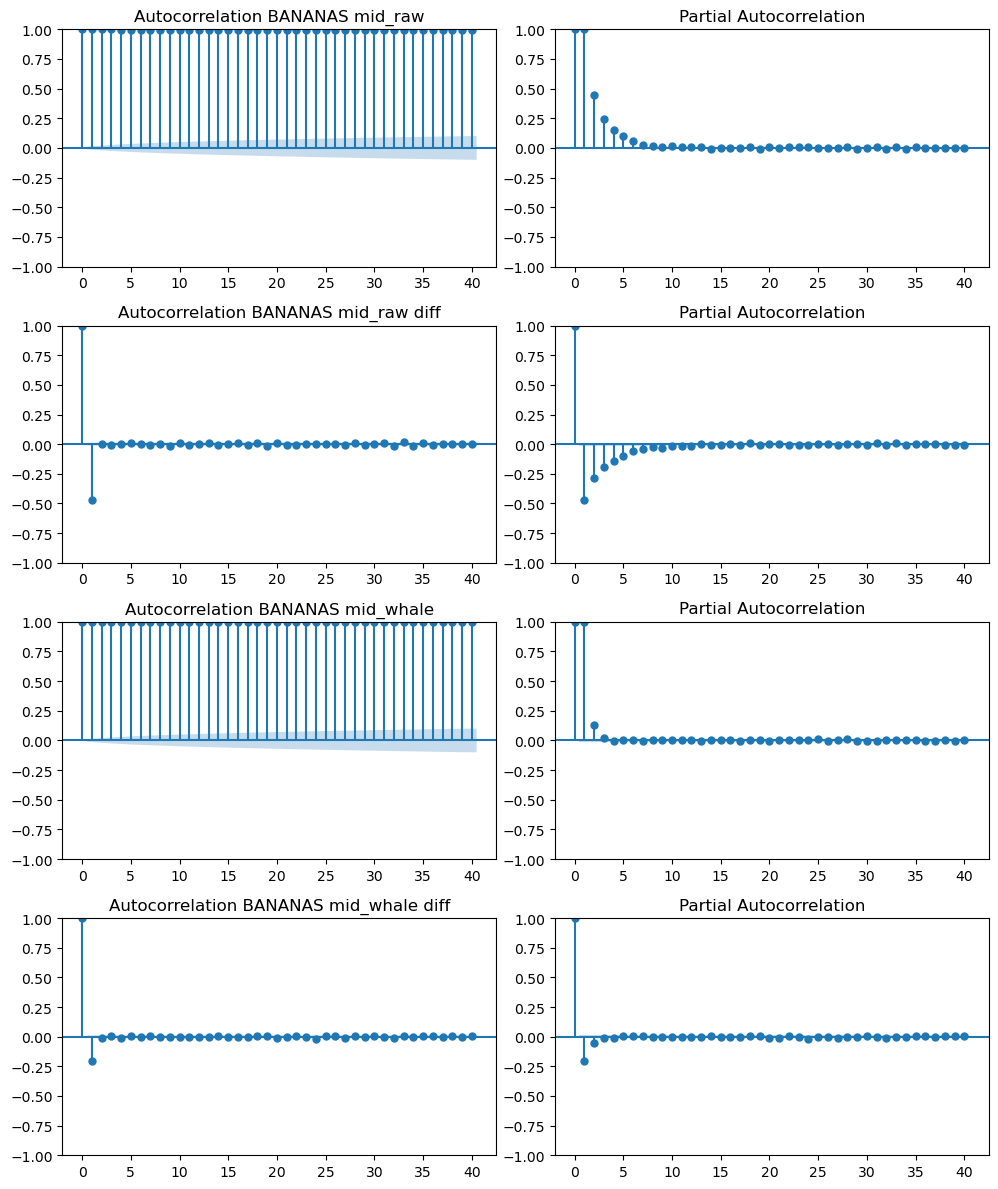

In [21]:
all_vals = {
    f"{_symbol} mid_raw": mid_df["mid"],
    f"{_symbol} mid_raw diff": (mid_df["mid"] - mid_df["mid"].shift(1)).fillna(0),
    f"{_symbol} mid_whale": quote_df["mid"],
    f"{_symbol} mid_whale diff": (quote_df["mid"] - quote_df["mid"].shift(1)).fillna(0),
}

fig, axs = plt.subplots(len(all_vals), 2, figsize=(10, 3 * len(all_vals)))

for index, (name, vals) in enumerate(all_vals.items()):

    print("\n" + name)
    # check non stationary
    check_stationary(vals)

    axrow = axs[index]

    ax = axrow[0]
    plot_acf(vals, ax=ax, lags=40)
    ax.set_title(ax.get_title() + " " + name)

    ax = axrow[1]
    plot_pacf(vals, method="ywm", ax=ax, lags=40)
    # ax.set_ylim(-0.1, 0.1)    

plt.tight_layout()
plt.show()


## Gear vs Dolphins trading

fname ../data/round3/prices_round_3_day_0.csv
fname ../data/round3/prices_round_3_day_1.csv
fname ../data/round3/prices_round_3_day_2.csv
fname ../data/round3/prices_round_3_day_0.csv
fname ../data/round3/prices_round_3_day_1.csv
fname ../data/round3/prices_round_3_day_2.csv


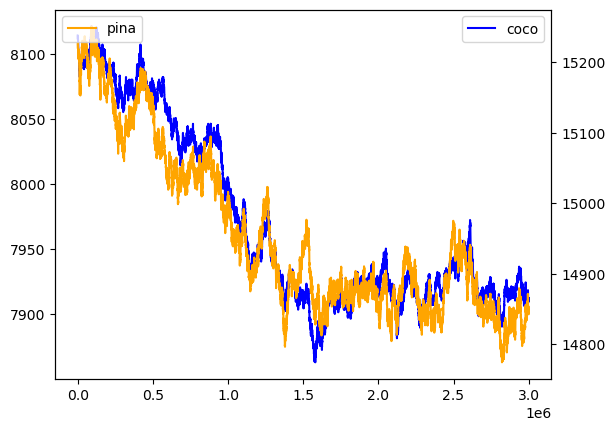

In [22]:
_day_range = [0, 1, 2]
# _day_range = [-1, 0, 1]

coco_price_df = get_symbol_prices("COCONUTS", _day_range)
pina_price_df = get_symbol_prices("PINA_COLADAS", _day_range)

coco_df = get_whale_quotes(coco_price_df)
pina_df = get_whale_quotes(pina_price_df)
pair_df = pd.DataFrame({
    "mid_coco": coco_df["mid_price"], 
    "mid_pina": pina_df["mid_price"],
    "time": pina_df["time"],
})

fig, ax = plt.subplots()

ax.plot(pair_df["time"], pair_df["mid_coco"], color="blue", label="coco")
ax.legend(loc=1)

ax2 = ax.twinx()

ax2.plot(pair_df["time"], pair_df["mid_pina"], color="orange", label="pina")
ax2.legend(loc=2)

### plot first diffs over time

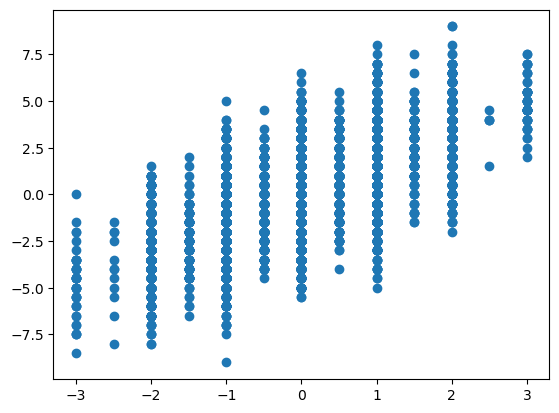

In [23]:
plt.scatter(pair_df["mid_coco"].diff(1), pair_df["mid_pina"].diff(1))

In [ ]:
plt.figure(figsize=(12, 3))

all_x = pair_df["mid_coco"].diff(1).dropna()
all_y = pair_df["mid_pina"].diff(1).dropna()

xlim = all_x.min(), all_x.max()
ylim = all_y.min(), all_y.max()

big_model = np.poly1d(np.polyfit(all_x, all_y, deg=1))
print("big_model", big_model.coef)

### params
chunk_size = 100


model_data = []

for i in range(len(pair_df) - chunk_size):

    lb = i
    ub = lb + chunk_size

    df = pair_df.iloc[lb:ub]

    x = df["mid_coco"].diff(1).dropna()
    y = df["mid_pina"].diff(1).dropna()

    inds = x.index.intersection(y.index)

    x = x[inds]
    y = y[inds]

    # fit line
    model = np.poly1d(np.polyfit(x, y, deg=1))
    model_data += [{
        "m": model.coef[0],
        "b": model.coef[1],
        "r2": r2_score(y, model(x)),
    }]

#     if i < 5:
#         plt.subplot(121)
#         plt.hist(x, bins=50)
#         plt.hist(y, bins=50, alpha=0.5)

#         plt.subplot(122)
#         plt.scatter(x, y, s=1)
#         plt.plot(x, model(x), color="red", label="fit")
#         plt.plot(x, model(x), color="black", label="fit")
#         plt.xlim(xlim)
#         plt.ylim(ylim)
        
#         plt.show()

#         print("model", model.coef)
model_df = pd.DataFrame(model_data)

big_model [ 1.51496779 -0.0023488 ]


In [ ]:
plt.plot(model_df["r2"], label="r2")
plt.plot(model_df["m"], label="m")
plt.plot(model_df["b"], label="b")
plt.axhline(y=1.5)

plt.legend()


In [ ]:
check_stationary(model_df["m"])

In [ ]:
# get errors
error = pair_df["mid_pina"] - pair_df["mid_coco"] * 1.5 - 3000
error_df = pd.DataFrame({"error": error})

# check stationarity of the error
check_stationary(error_df["error"])

# get `change` stats
error_df["above"] = error_df["error"] > 0
error_df["change"] = error_df["above"] != error_df["above"].shift(1)


In [ ]:
plt.plot(error_df["error"])

In [ ]:
error.describe()

In [ ]:
low, high = 0, 0

bounds = []

for index, row in error_df.iterrows():
    if row["change"]:
        bounds += [(low, high)]
        low, high = 0, 0
        
    # record max error
    low = min(low, row["error"])
    high = max(low, row["error"])
    
    
df = pd.DataFrame(bounds, columns=["low", "high"])
df["bound"] = np.maximum(df["low"].abs(), df["high"].abs())

# get number of times we reach each threshold
freq_df = df.groupby("bound")[["low"]].count().rename({"low": "count"}, axis=1)
freq_df = freq_df.sort_index(ascending=False).cumsum().reset_index()
freq_df["pnl"] = freq_df["bound"] * freq_df["count"]

In [ ]:
plt.plot(freq_df["bound"], freq_df["pnl"])

In [ ]:
freq_df.sort_values(by="pnl", ascending=False)

## Pairs trading

In [ ]:
_day_range = [0, 1, 2]

price_df = get_symbol_prices(None, _day_range)


In [ ]:
_day_range = [0, 1, 2]
# _day_range = [-1, 0, 1]

pina_price_df = get_symbol_prices("PINA_COLADAS", _day_range)

coco_df = get_whale_quotes(coco_price_df)
pina_df = get_whale_quotes(pina_price_df)
pair_df = pd.DataFrame({
    "mid_coco": coco_df["mid_price"], 
    "mid_pina": pina_df["mid_price"],
    "time": pina_df["time"],
})

fig, ax = plt.subplots()

ax.plot(pair_df["time"], pair_df["mid_coco"], color="blue", label="coco")
ax.legend(loc=1)

ax2 = ax.twinx()

ax2.plot(pair_df["time"], pair_df["mid_pina"], color="orange", label="pina")
ax2.legend(loc=2)

### plot first diffs over time

In [ ]:
plt.scatter(pair_df["mid_coco"].diff(1), pair_df["mid_pina"].diff(1))

In [ ]:
plt.figure(figsize=(12, 3))

all_x = pair_df["mid_coco"].diff(1).dropna()
all_y = pair_df["mid_pina"].diff(1).dropna()

xlim = all_x.min(), all_x.max()
ylim = all_y.min(), all_y.max()

big_model = np.poly1d(np.polyfit(all_x, all_y, deg=1))
print("big_model", big_model.coef)

### params
chunk_size = 100


model_data = []

for i in range(len(pair_df) - chunk_size):

    lb = i
    ub = lb + chunk_size

    df = pair_df.iloc[lb:ub]

    x = df["mid_coco"].diff(1).dropna()
    y = df["mid_pina"].diff(1).dropna()

    inds = x.index.intersection(y.index)

    x = x[inds]
    y = y[inds]

    # fit line
    model = np.poly1d(np.polyfit(x, y, deg=1))
    model_data += [{
        "m": model.coef[0],
        "b": model.coef[1],
        "r2": r2_score(y, model(x)),
    }]

#     if i < 5:
#         plt.subplot(121)
#         plt.hist(x, bins=50)
#         plt.hist(y, bins=50, alpha=0.5)

#         plt.subplot(122)
#         plt.scatter(x, y, s=1)
#         plt.plot(x, model(x), color="red", label="fit")
#         plt.plot(x, model(x), color="black", label="fit")
#         plt.xlim(xlim)
#         plt.ylim(ylim)
        
#         plt.show()

#         print("model", model.coef)
model_df = pd.DataFrame(model_data)

In [ ]:
plt.plot(model_df["r2"], label="r2")
plt.plot(model_df["m"], label="m")
plt.plot(model_df["b"], label="b")
plt.axhline(y=1.5)

plt.legend()


In [ ]:
check_stationary(model_df["m"])

In [ ]:
# get errors
error = pair_df["mid_pina"] - pair_df["mid_coco"] * 1.5 - 3000
error_df = pd.DataFrame({"error": error})

# check stationarity of the error
check_stationary(error_df["error"])

# get `change` stats
error_df["above"] = error_df["error"] > 0
error_df["change"] = error_df["above"] != error_df["above"].shift(1)


In [ ]:
plt.plot(error_df["error"])

In [ ]:
error.describe()

In [ ]:
low, high = 0, 0

bounds = []

for index, row in error_df.iterrows():
    if row["change"]:
        bounds += [(low, high)]
        low, high = 0, 0
        
    # record max error
    low = min(low, row["error"])
    high = max(low, row["error"])
    
    
df = pd.DataFrame(bounds, columns=["low", "high"])
df["bound"] = np.maximum(df["low"].abs(), df["high"].abs())

# get number of times we reach each threshold
freq_df = df.groupby("bound")[["low"]].count().rename({"low": "count"}, axis=1)
freq_df = freq_df.sort_index(ascending=False).cumsum().reset_index()
freq_df["pnl"] = freq_df["bound"] * freq_df["count"]

In [ ]:
plt.plot(freq_df["bound"], freq_df["pnl"])

In [ ]:
freq_df.sort_values(by="pnl", ascending=False)